# Alarming Decrease in Water Level in the Great Salt Lake

This is the draft project report assignment which includes the research question, title, introduction, site description, data description, methods, results, discussion, and conclusion.

@author = Kaylee Molan for ESCI 7/896.02  
@date = 2023-04-27 
@license = MIT -- https://opensource.org/licenses/MIT

 ## Research Question:
What is the theoretical date that the Great Salt Lake be completely dry if no drastic preventative measures are taken?

## Introduction 
The Great Salt Lake, located in Salt Lake City, Utah, is the largest salt water lake in the Western Hemisphere. It has been an important landmark for centuries and plays a significant role in the ecology, economy, and culture of the region. The lake is a vital habitat for millions of birds and other wildlife, and its shrinking size could threaten their survival. Additionally, the lake is a crucial source of water for agriculture and other industries in the region, and its loss could have serious economic consequences. However, the lake is facing a serious threat of drying up, which could in turn have severe consequences for the local environment and economy. Some consequences could include job losses and decreased economic growth, exacerbation of water shortages, and air pollution since the bed of the Great Salt Lake holds high levels of dangerous particles like arsenic, antimony, copper, zirconium, and various heavy metals.

In this Python project, I aim to predict the date when the Great Salt Lake will dry up. I will use data analysis and other techniques to analyze historical data on the lake's water levels, precipitation, and discharge from the 3 major rivers contributing flows into the Great Lake. We will then use this analysis to estimate the change in storage and forecast the date when it may dry up, if no preventative measures are taken. 

## Description of Study Site 
The Great Salt Lake watershed is a large, complex ecosystem located in northern Utah, in the western United States. The boundary of the study site includes the entire surface area of the Great Salt Lake, which now only spans approximately 950 square miles and once spanning 2300 square miles. The Great Salt Lake is bordered by several mountain ranges, including the Wasatch Range to the east and the Stansbury Range to the west. The lake's shoreline is irregular, with numerous bays and islands. The climate in the region surrounding the Great Salt Lake is semi-arid, with hot summers and cold winters. Average annual precipitation is relatively low, at around 380 millimeters per year, and much of this falls as snow in the winter. The average temperature in the region is around 13 degrees Celsius. 


The watershed is home to a diverse range of flora and fauna, including numerous migratory birds, fish species, and wetland plants. The area is also important for its unique geological features, including the surrounding mountains and the salt flats that surround the lake. The Great Salt Lake is an endorheic lake, meaning that it does not have an outflow to the ocean and instead drains into nearby wetlands and evaporation basins. The watershed is fed by numerous streams and rivers, with the Bear, Jordan, and Weber rivers providing the greatest flow into the lake.

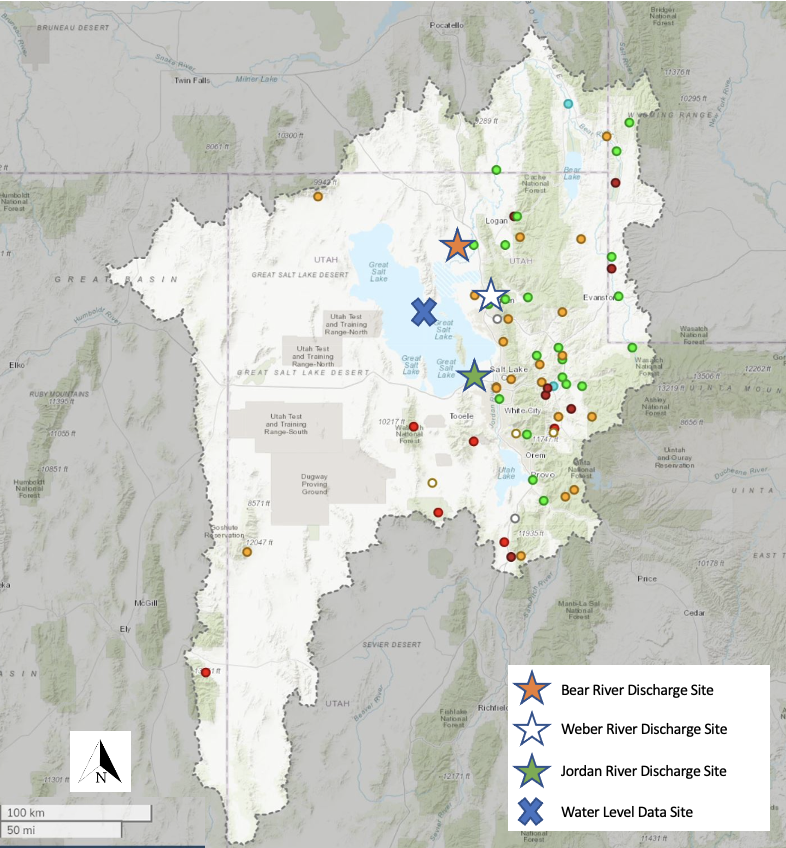


## Description of Data Sets

GSL-precip: 
This dataset is from NOAA Climate at a Glance for Salt Lake City, Utah and contains the annual precipitation (in inches) from the year 1948 to 2022.
Link: https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/city/time-series/USW00024127/pcp/ann/1/1895-2023?base_prd=true&begbaseyear=1895&endbaseyear=2020

GSL-waterlevel:
This dataset is from USGS Site 10010100 and contains the annual water surface elevation (in feet) of the Great Salt Lake in Salt Lake City, Utah from the year 1990 to 2022. 
Link: https://waterdata.usgs.gov/nwis/annual?site_no=10010100&agency_cd=USGS&por_10010100_178324=448793,62614,178324,1966,2023&year_type=W&referred_module=sw&format=rdb

BearRiver-Q:
This dataset is from USGS  10126000 and contains the annual discharge (in cubic feet per second) of the Bear River, an inlet to the Great Salt Lake in Salt Lake City, Utah from the year 1950 to 2022. 

JordanRiver-Q:
This dataset is from USGS 10171000 and contains the annual discharge (in cubic feet per second) of the Jordan River, an inlet to the Great Salt Lake in Salt Lake City, Utah from the year 1944 to 2022. 

WeberRiver-Q:
This dataset is from USGS 10136500 and contains the annual discharge (in cubic feet per second) of the Weber River, an inlet to the Great Salt Lake in Salt Lake City, Utah from the year 1921 to 2022. 
Links for the rivers: https://dashboard.waterdata.usgs.gov/app/nwd/en/?region=lower48&aoi=default 


### Load and initial plot of raw data 

In [1]:
import os
import pandas as pd
from datetime import datetime, timedelta
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#%% Specify parameters 
# Primary and secondary precipitation data (with extension)
infile_names = 'GSL-precip.csv', 'GSL-waterlevel.csv', 'WeberRiver-Q.csv', 'JordanRiver-Q.csv', 'BearRiver-Q.csv'

# Text for figure title
fig_title = "Great Salt Lake, Utah"

# Important lake characteristics
old_SA= 2300
old_elevation= 4211.85
current_SA= 950

In [2]:
#%% Load and examine precipitation and water level data

# Load precipitation data into dataframe
datap=pd.read_csv(infile_names[0],parse_dates=['Date'], 
                 index_col=['Date'], skiprows=4)
datap.index=pd.to_datetime(datap.index, format='%Y12')
datap.drop(columns = {"Anomaly"},inplace = True)
datap=datap.rename(columns={"Value":"Precipitation (in/year)"})

# Load water level data into dataframe
dataw=pd.read_csv(infile_names[1], comment="#", delimiter="\t", header=1,
                  parse_dates=['4s'],index_col=['4s'])
dataw.drop(columns = {"15s", "5s.1", "5s", "3n"},inplace = True)
dataw=dataw.rename(columns={"12n":"Water Level (feet)"})
dataw = dataw.rename_axis('Date')

# Print raw data in tables to display
print(datap)
print(dataw)

            Precipitation (in/year)
Date                               
1948-01-01                    14.49
1949-01-01                    16.74
1950-01-01                    13.52
1951-01-01                    17.53
1952-01-01                    15.17
...                             ...
2018-01-01                    13.24
2019-01-01                    20.13
2020-01-01                     8.99
2021-01-01                    15.38
2022-01-01                    12.61

[75 rows x 1 columns]
            Water Level (feet)
Date                          
1990-01-01            4203.492
1991-01-01            4201.284
1992-01-01            4199.492
1993-01-01            4197.561
1994-01-01            4197.488
1995-01-01            4197.572
1996-01-01            4197.704
1997-01-01            4198.192
1998-01-01            4200.639
1999-01-01            4202.446
2000-01-01            4202.113
2001-01-01            4200.363
2002-01-01            4198.499
2003-01-01            4196.715
2004-01-01   

In [3]:
#%% Load and examine discharge data

# Load Weber River discharge data into a dataframe
dataqw=pd.read_csv(infile_names[2], comment="#", delimiter="\t", header=1,
                  parse_dates=['4s'],index_col=['4s'])
dataqw.drop(columns = {"15s", "5s.1", "5s", "3n"},inplace = True)
dataqw=dataqw.rename(columns={"12n":"Weber Discharge (cfs)"})
dataqw = dataqw.rename_axis('Date')

# Load Jordan River discharge data into a dataframe
dataqj=pd.read_csv(infile_names[3], comment="#", delimiter="\t", header=1,
                  parse_dates=['4s'],index_col=['4s'])
dataqj.drop(columns = {"15s", "5s.1", "5s", "3n"},inplace = True)
dataqj=dataqj.rename(columns={"12n":"Jordan Discharge (cfs)"})
dataqj = dataqj.rename_axis('Date')

# Load Bear River discharge data into a dataframe
dataqb=pd.read_csv(infile_names[4], comment="#", delimiter="\t", header=1,
                  parse_dates=['4s'],index_col=['4s'])
dataqb.drop(columns = {"15s", "5s.1", "5s", "3n"},inplace = True)
dataqb=dataqb.rename(columns={"12n":"Bear Discharge (cfs)"})
dataqb = dataqb.rename_axis('Date')

# Print raw data in tables to display
print(dataqw)
print(dataqj)
print(dataqb)

            Weber Discharge (cfs)
Date                             
1921-01-01                 1195.0
1922-01-01                 1116.0
1923-01-01                 1004.0
1924-01-01                  439.8
1925-01-01                  538.3
...                           ...
2018-01-01                  191.0
2019-01-01                  449.5
2020-01-01                  261.1
2021-01-01                  117.7
2022-01-01                  188.2

[102 rows x 1 columns]
            Jordan Discharge (cfs)
Date                              
1944-01-01                   131.3
1945-01-01                   141.0
1946-01-01                   145.0
1947-01-01                   140.1
1948-01-01                   141.2
...                            ...
2018-01-01                   116.0
2019-01-01                   111.7
2020-01-01                   143.1
2021-01-01                   116.6
2022-01-01                   122.5

[79 rows x 1 columns]
            Bear Discharge (cfs)
Date                   

In [4]:
#%% Merge all data frames into one singular data frame

# Merged based on index columns (time) into one dataframe
merged_df = pd.merge(dataqw,dataqb,left_index=True, right_index=True)
merged_df = pd.merge(merged_df, dataqj, left_index=True, right_index=True)
merged_df = pd.merge(merged_df, dataw, left_index=True, right_index=True)
merged_df = pd.merge(merged_df, datap, left_index=True, right_index=True)
data= merged_df

# Print raw data in tables to display
print(data)

            Weber Discharge (cfs)  Bear Discharge (cfs)  \
Date                                                      
1990-01-01                  229.2                 630.0   
1991-01-01                  282.6                 747.8   
1992-01-01                  193.9                 434.9   
1993-01-01                  489.2                1233.0   
1994-01-01                  322.5                 771.0   
1995-01-01                  626.2                1208.0   
1996-01-01                  575.4                1319.0   
1997-01-01                  814.8                2532.0   
1998-01-01                  738.6                2806.0   
1999-01-01                  625.7                2568.0   
2000-01-01                  274.6                1246.0   
2001-01-01                  221.1                 621.6   
2002-01-01                  186.2                 699.3   
2003-01-01                  142.7                 520.2   
2004-01-01                  184.0                 615.7 

Text(0.5, 1.0, 'Great Salt Lake, Utah')

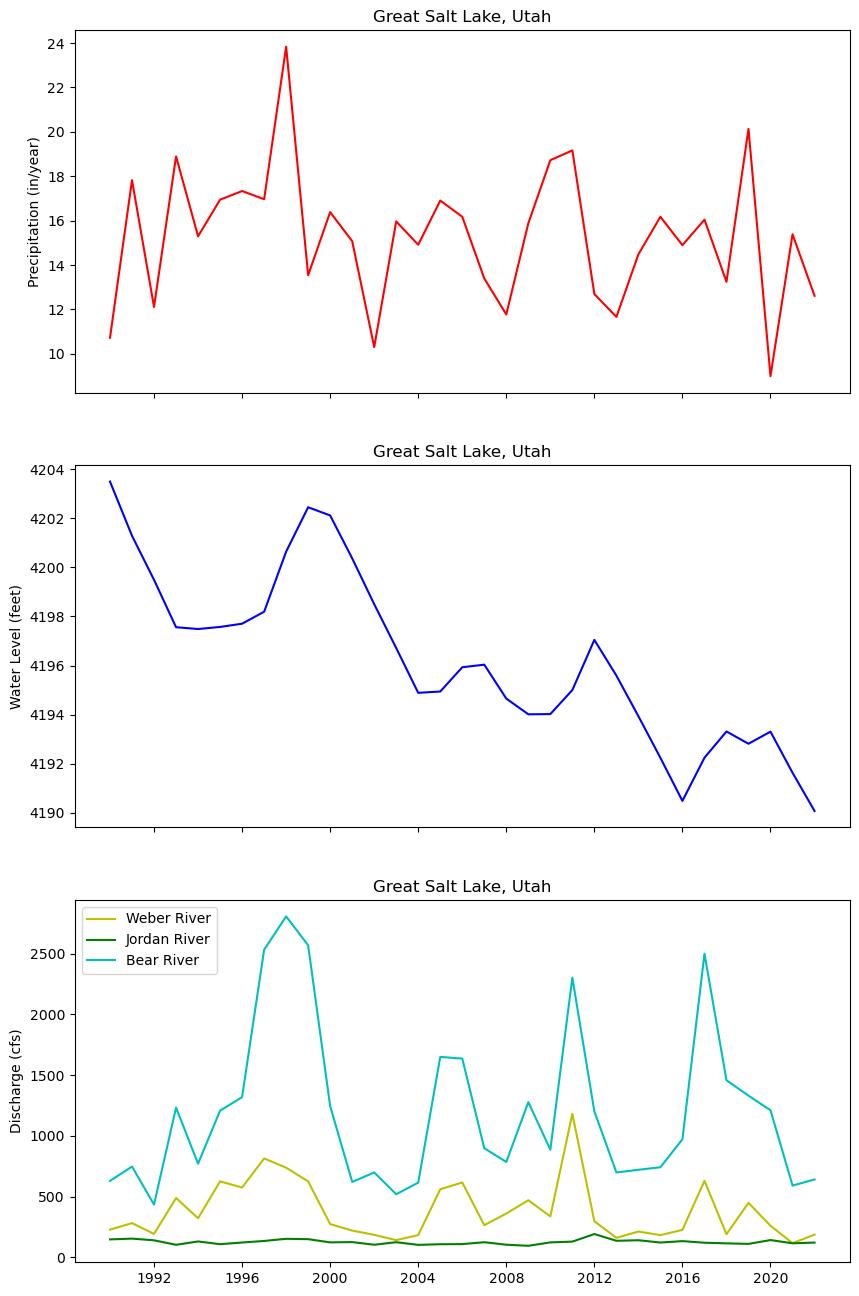

In [5]:
#%% Figure 1: Raw Data

# Plot raw data w/ 3 subpanels (precipitation, water level, discharge) to visualize relationship
# Create plot to display data
fig, (ax1,ax2,ax3)= plt.subplots(3,1,figsize=(10,16), sharex=True)

# Plot precipitation
ax1.plot(data['Precipitation (in/year)'],'r-', label='Annual Precipitation')
ax1.set_ylabel('Precipitation (in/year)')
ax1.set_title(fig_title)

# Plot water level data
ax2.plot(data['Water Level (feet)'], 'b-', label= 'Water Level')
ax2.set_ylabel('Water Level (feet)')
ax2.set_title(fig_title)

# Plot discharge data
ax3.plot(data['Weber Discharge (cfs)'], 'y-', label= 'Weber River')
ax3.plot(data['Jordan Discharge (cfs)'], 'g-', label= 'Jordan River')
ax3.plot(data['Bear Discharge (cfs)'], 'c-', label= 'Bear River')
ax3.legend()
ax3.set_ylabel('Discharge (cfs)')
ax3.set_title(fig_title)

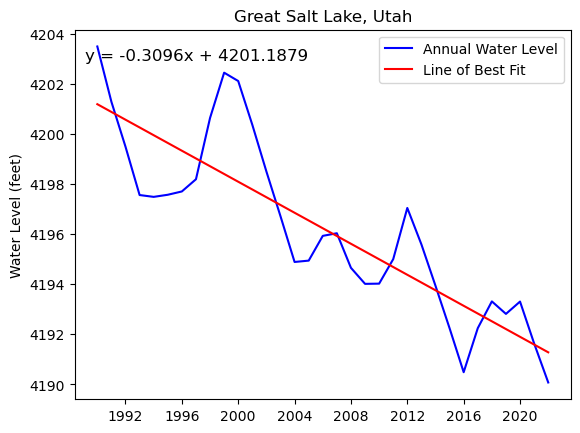

In [6]:
#%% Show the alarming decrease in water level over entire available study period (only shows 1990 onward) 

# Plot water level (Figure 2)
fig, ax1= plt.subplots()

ax1.plot(dataw['Water Level (feet)'],'b-', label='Annual Water Level')
ax1.set_ylabel('Water Level (feet)')
ax1.set_title(fig_title)

# Create line of best fit
x = np.arange(len(dataw['Water Level (feet)']))
coef = np.polyfit(x, dataw['Water Level (feet)'], 1)
line = coef[0] * x + coef[1]

# Plot the line of best fit
ax1.plot(dataw.index, line, 'r-', label='Line of Best Fit')
eqn = f'y = {coef[0]:.4f}x + {coef[1]:.4f}'
ax1.text(0.02, 0.95, eqn, transform=ax1.transAxes, fontsize=12, verticalalignment='top')

# Add the legend and show the plot
ax1.legend()
plt.show()

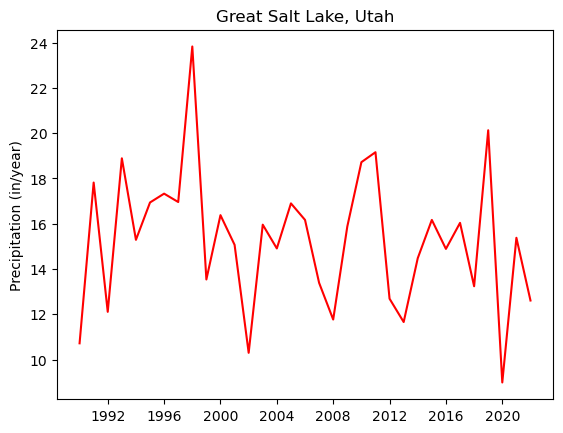

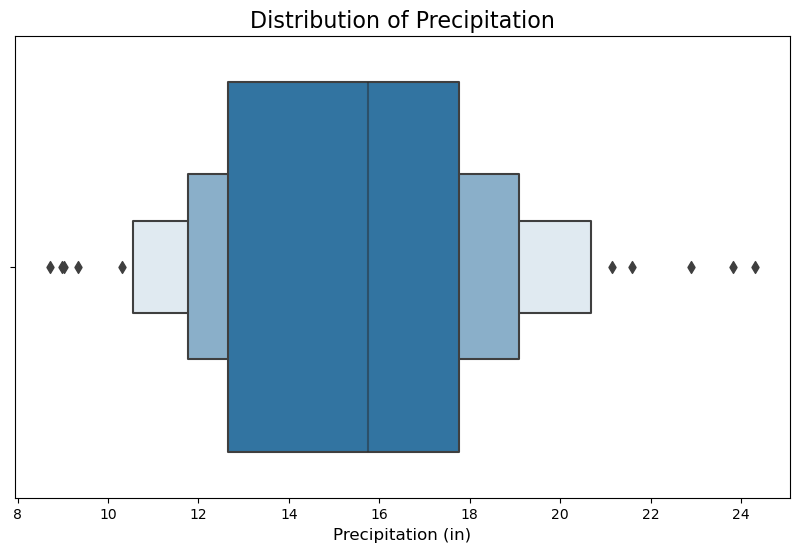

In [7]:
#%% Assessment of precipitation as driving variable 

# Plot precipitation over the entire available study period to see if drought is a driving variable (Figure 3)
fig, ax1= plt.subplots()

ax1.plot(data['Precipitation (in/year)'],'r-', label='Annual Precipitation')
ax1.set_ylabel('Precipitation (in/year)')
ax1.set_title(fig_title)

# Plot the boxplot (Figure 4)
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxenplot(x=datap['Precipitation (in/year)'], data=data, ax=ax)
ax.set_xlabel('Precipitation (in)', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.set_title('Distribution of Precipitation', fontsize=16)
plt.show()

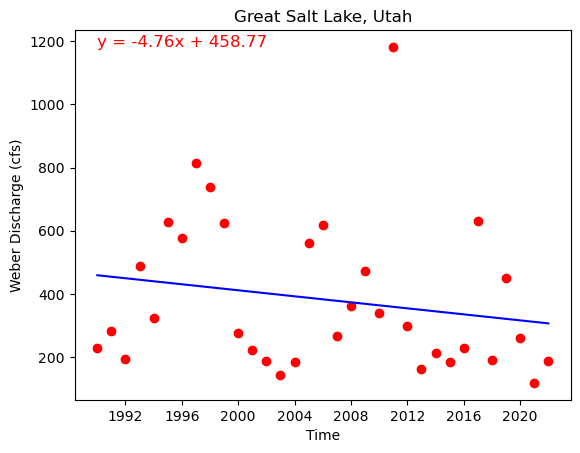

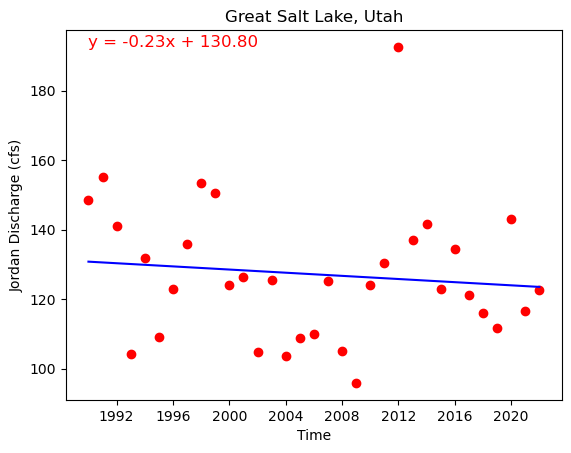

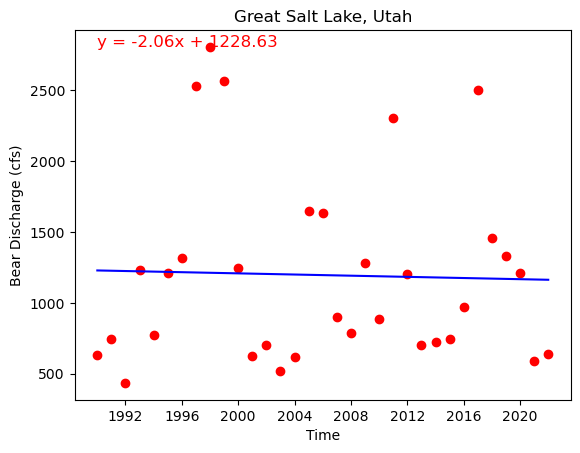

In [8]:
#%% Assessment of discharge as driving variable

#Create a scatter plot with regression line for Weber River (Figure 5)
fig, ax = plt.subplots()
ax.scatter(data.index, data['Weber Discharge (cfs)'], color='r')

# Add labels and title to the plot
ax.set_xlabel('Time')
ax.set_ylabel('Weber Discharge (cfs)')
ax.set_title(fig_title)

# Add line of best fit
x = np.arange(len(data))
y = data['Weber Discharge (cfs)'].values
fit = np.polyfit(x, y, deg=1)
ax.plot(data.index, fit[0] * x + fit[1], color='b')
eqn_str = 'y = {:.2f}x + {:.2f}'.format(fit[0], fit[1])
ax.text(data.index[0], max(y), eqn_str, fontsize=12, color='r')

# Display the plot
plt.show()

# Create a scatter plot with regression line for Jordan River (Figure 6)
fig, ax = plt.subplots()
ax.scatter(data.index, data['Jordan Discharge (cfs)'], color='r')

# Add labels and title to the plot
ax.set_xlabel('Time')
ax.set_ylabel('Jordan Discharge (cfs)')
ax.set_title(fig_title)

# Add line of best fit
x = np.arange(len(data))
y = data['Jordan Discharge (cfs)'].values
fit = np.polyfit(x, y, deg=1)
ax.plot(data.index, fit[0] * x + fit[1], color='b')
eqn_str = 'y = {:.2f}x + {:.2f}'.format(fit[0], fit[1])
ax.text(data.index[0], max(y), eqn_str, fontsize=12, color='r')

# Display the plot
plt.show()

# Create a scatter plot with regression line for Bear River (Figure 7)
fig, ax = plt.subplots()
ax.scatter(data.index, data['Bear Discharge (cfs)'], color='r')

# Add labels and title to the plot
ax.set_xlabel('Time')
ax.set_ylabel('Bear Discharge (cfs)')
ax.set_title(fig_title)

# Add line of best fit
x = np.arange(len(data))
y = data['Bear Discharge (cfs)'].values
fit = np.polyfit(x, y, deg=1)
ax.plot(data.index, fit[0] * x + fit[1], color='b')
eqn_str = 'y = {:.2f}x + {:.2f}'.format(fit[0], fit[1])
ax.text(data.index[0], max(y), eqn_str, fontsize=12, color='r')

# Display the plot
plt.show()

In [9]:
#%% Find evaporation over the last 20 years assuming change in storage is negligible (0)

oldcs= 0
evap= ((datap['Precipitation (in/year)'].loc['1966-01-01':'1986-01-01'].mean()/12 +(dataqb['Bear Discharge (cfs)'].loc['1966-01-01':'1986-01-01'].mean()+ dataqw['Weber Discharge (cfs)'].loc['1966-01-01':'1986-01-01'].mean() + dataqj['Jordan Discharge (cfs)'].loc['1966-01-01':'1986-01-01'].mean())/(old_SA*2.788e7))-oldcs)

#Mass balance of lake currently based from 1990 to 2022 to find the new change in storage
newcs= ((datap['Precipitation (in/year)'].loc['1990-01-01':'2022-01-01'].mean()/12) +(dataqb['Bear Discharge (cfs)'].loc['1990-01-01':'2022-01-01'].mean()+ dataqw['Weber Discharge (cfs)'].loc['1990-01-01':'2022-01-01'].mean() + dataqj['Jordan Discharge (cfs)'].loc['1990-01-01':'2022-01-01'].mean())/(current_SA*2.788e7))-evap

In [10]:
#%% Lake dry up date

# Extrapolate data to estimate the theoretical date the lake will dry up
days_to_dry = data['Water Level (feet)'].iloc[-1]  / -newcs
dry_date = data.index[-1] + timedelta(days=days_to_dry)

# Print date to screen
print(f"The theoretical dry-up date of the Great Salt Lake is {dry_date}")

The theoretical dry-up date of the Great Salt Lake is 2086-01-17 03:15:52.779671


### Discussion/conclusion

The study revealed that the theoretical dry-up date of the Great Salt Lake is January 17, 2086. This implies that the lake will not longer be in existence to act as a water source by this date. It is important to note that this is assuming no preventative measures are taken whatsoever, it assumes loss in storage will continue to drastically decrease over time. 

The direct relationship between precipitation, discharge from the rivers, and water level shown in Figure 1 provides valuable insight into the factors affecting the water level of the lake. The more precipitation results in a higher discharge in the contributing rivers, and therefore an increase in water level, which can be seen as peaks of each correspond to one another. The decreasing trend in water level sinc 1990 shown in Figure 2, along with the estimated rate of change of -0.3096, indicates that urgent action is needed to address the factors causing the decrease in water level. Figure 3 displays the precipitation over time and provides a better visualize into the variability of precipitation over time, which can also been seen in Figure 4. The finding that precipitation is not the major driver of the decrease in water level is surprising and emphasizes the need to focus on other potential causes. The possible scenarios provided for the decreasing flows from the contributing rivers, including water utilization and the drying up of the individual rivers, highlight the need for further investigation and monitoring. This revealation leaves the major contributor as either a decrease in discharge in the contributing rivers, or some other unknown source. Figures 5, 6, and 7 display a scatterplot of the Weber, Jordan, and Bear discharges over time, with an added line of best fit to each to visualize the decrease in flow entering the Great Salt Lake. In these figures, it can be noted that the slopes for every river's discharge is negative (-4.76, -0.23, -2.06) which displays the overall notion that the flows entering the Great Salt Lake are generally decreasing. This signifies that the decrease in receiving flows to the Great Salt Lake is a driver in the drying up of it. The data in Figures 5, 6, and 7 furtherhighlight the need to investigate the causes of decreasing flows from the contributing rivers.

Based on the results presented in the study, it appears that the data do support the hypothesis and expectations described in the introduction to a certain extent. The hypothesis described in the introduction is that the Great Salt Lake is drying up due to a combination of factors, including a decrease in precipitation and discharge from the rivers that contribute to the lake. The results of the study support this hypothesis, as they reveal a significant decrease in water level in the lake over time, which is primarily attributed to a decrease in discharge from the rivers that feed the lake. The expectations described in the introduction also align with the results of the study to some extent. For example, the expectation that there would be a correlation between precipitation, discharge, and water level is supported by the results of the study, which show that these variables have a direct relationship with one another. However, the study also reveals some unexpected findings that do not align with the expectations described in the introduction. For example, the study suggests that precipitation is not the primary driver of the decrease in water level in the Great Salt Lake, contrary to what was expected. Additionally, the study suggests that there may be other factors contributing to the decrease in discharge from the rivers, such as water utilization prior to the rivers flowing into the lake, which was not specifically mentioned in the introduction. Overall, while the data support the main hypothesis and some of the expectations described in the introduction, there were also unexpected findings that require further investigation and consideration.

When considering methodology, there are manys this study could be improved. Firstly, the sample size should definitely increase. Including data from more rivers could help to improve the accuracy of the findings. Additionally, more advanced modelling techniques could be used. This stuidy relied on basic statistical analysis to model the relationship between variables and using more advanced techniques can provide more accurate predictions. Lastly, other factors affecting variables should be included. This study currently only considers the effect of precipitation and discharge from the rivers on water level and including other factors such as groundwater recharge can provide a more comprehensive understanding of the factors affecting the water level of the Great Salt Lake.

On the other hand, the results of this study provide important information for scientists and watershed managers regarding the future of the Great Salt Lake. The finding that the theoretical dry-up date of the lake is January 17, 2086, assuming no preventative measures are taken, highlights the urgency of the situation and the need for action. Overall, these results underscore the importance of proactive management and conservation efforts to address the decreasing water level in the Great Salt Lake. This information can be used to inform policy decisions and management strategies to protect the lake as a vital water source and ecosystem.

### References

Amazing Great Salt Lake. SLCo. (2016, August 19). Retrieved April 26, 2023, from https://slco.org/watershed/know-your-local-waters/amazing-great-salt-lake/ 

Great Salt Lake Water Levels. Utah Division of Wildlife Resources. (2023). Retrieved April 26, 2023, from https://wildlife.utah.gov/gslep/about/water-levels.html 

Utah Travel Industry Website. (n.d.). Great Salt Lake Facts and Information. Deseret Digital Media - Utah.com. Retrieved April 26, 2023, from https://www.utah.com/destinations/state-parks/great-salt-lake-state-park/great-salt-lake-facts/ 
